In [3]:
import pandas as pd
from utils.data_preprocessor import DataPreprocessor
from utils.eda import EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv('../data/input/shopping_trends.csv', index_col=0)
data

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly


In [5]:
# Data Preprocessing
preprocessor = DataPreprocessor(data)

In [6]:
# Handle missing values
# print(data.isnull().any())

# No NA values in the data

In [7]:
outliers = preprocessor.detect_outliers(method='iqr')
print("Outliers detected using IQR method:\n", outliers.sum())

Outliers detected using IQR method:
 Age                      0
Purchase Amount (USD)    0
Review Rating            0
Previous Purchases       0
dtype: int64


In [8]:
# Get preprocessed data
preprocessed_data = preprocessor.get_preprocessed_data()
preprocessed_data

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly


In [9]:
# EDA
eda = EDA(preprocessed_data)

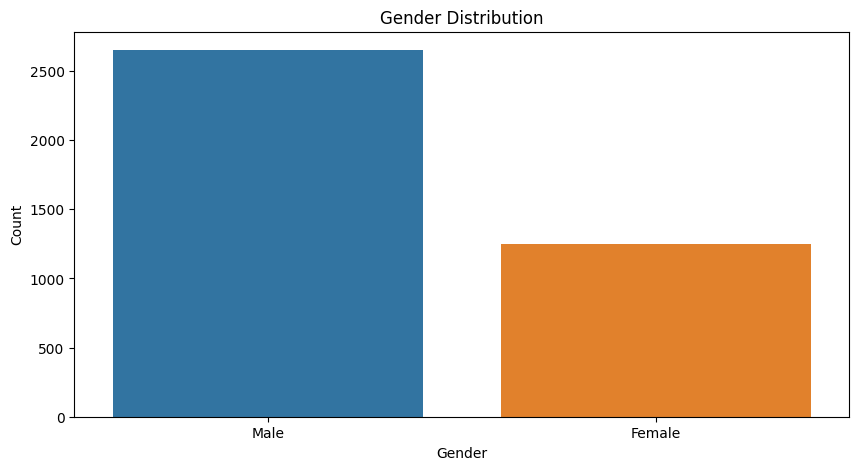

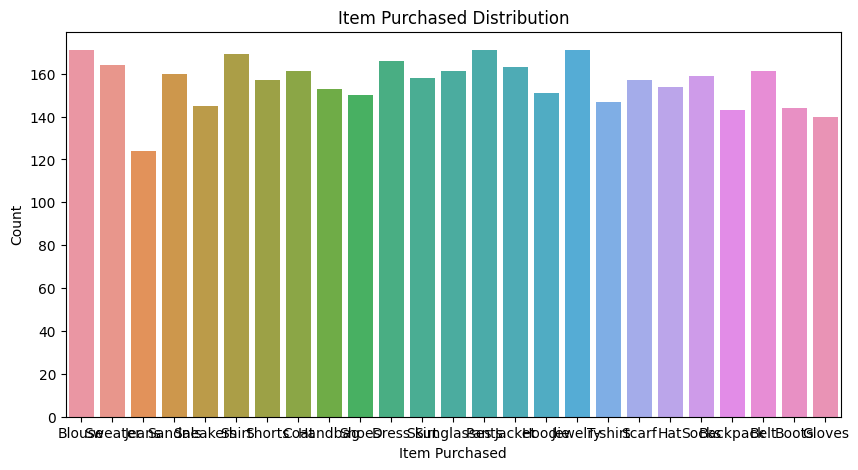

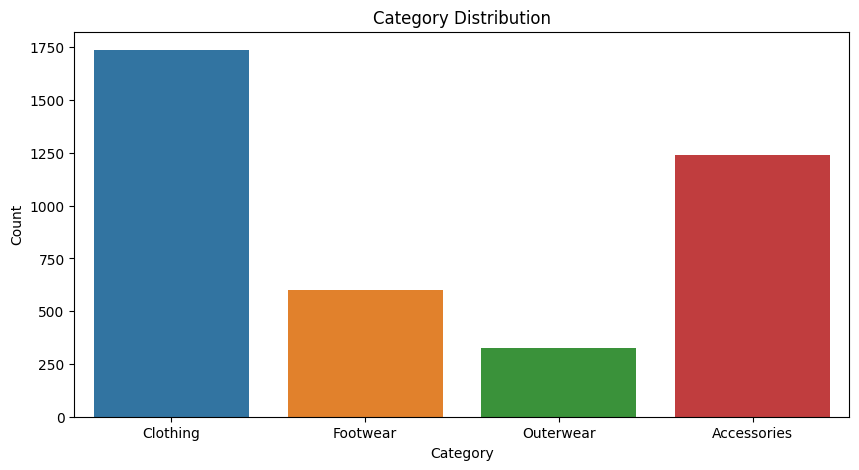

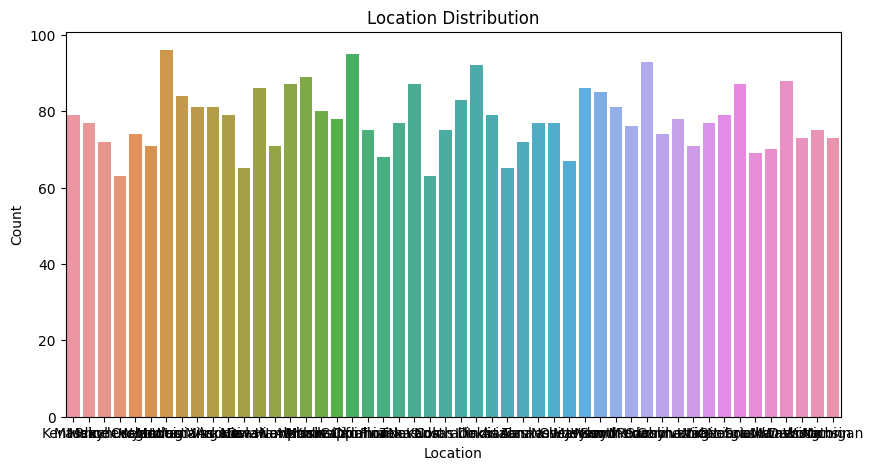

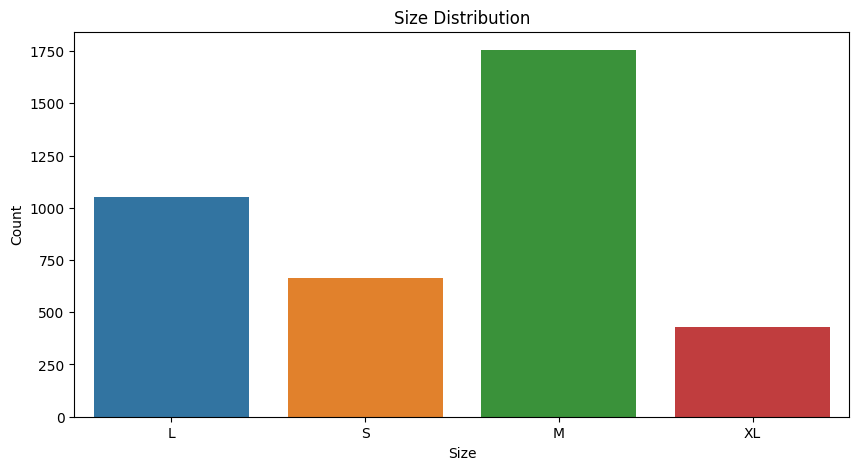

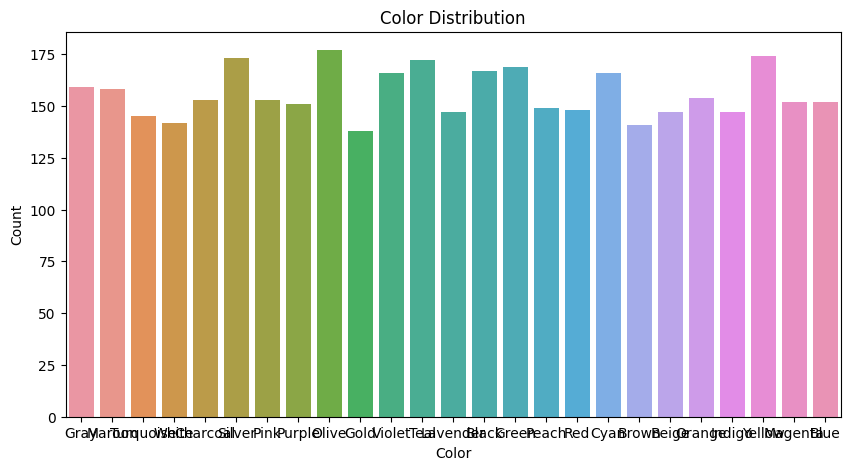

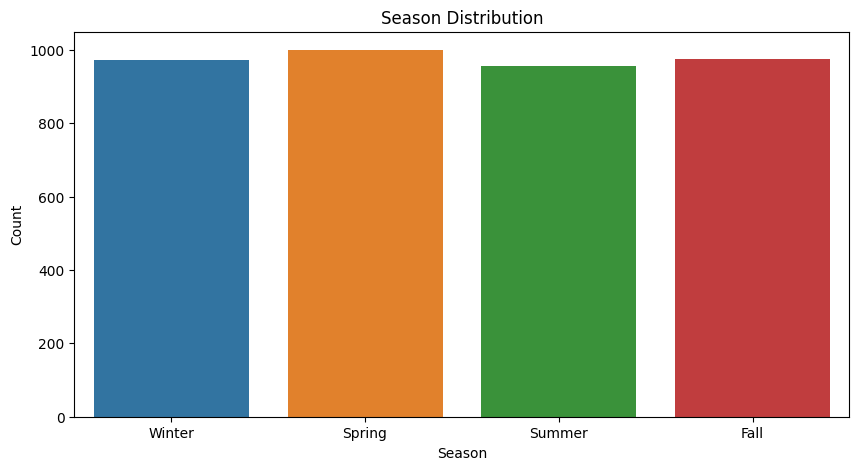

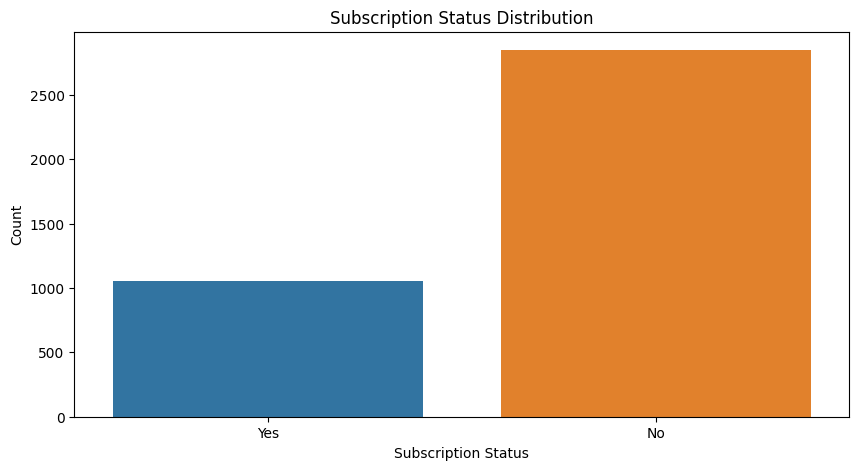

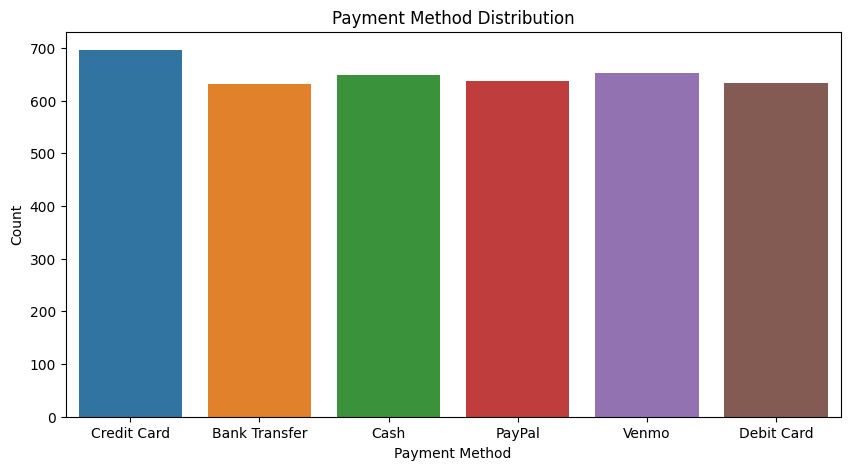

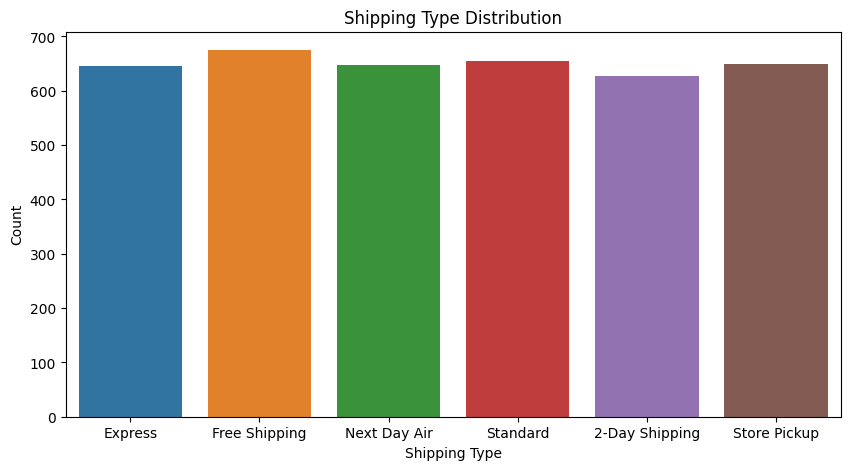

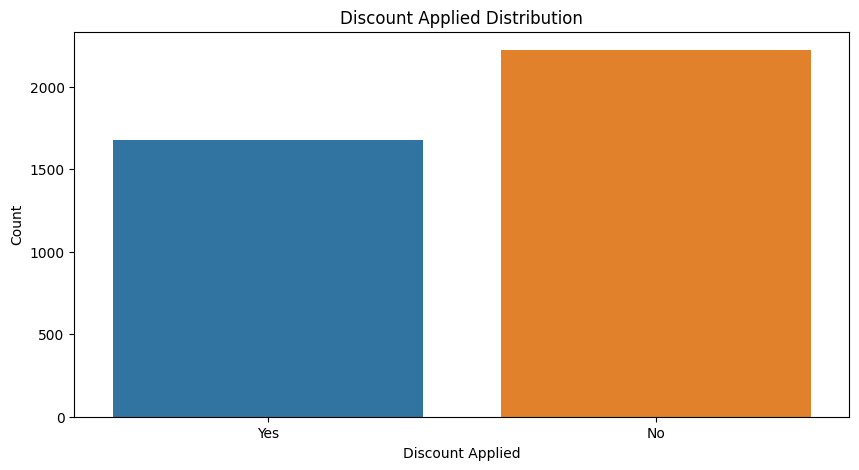

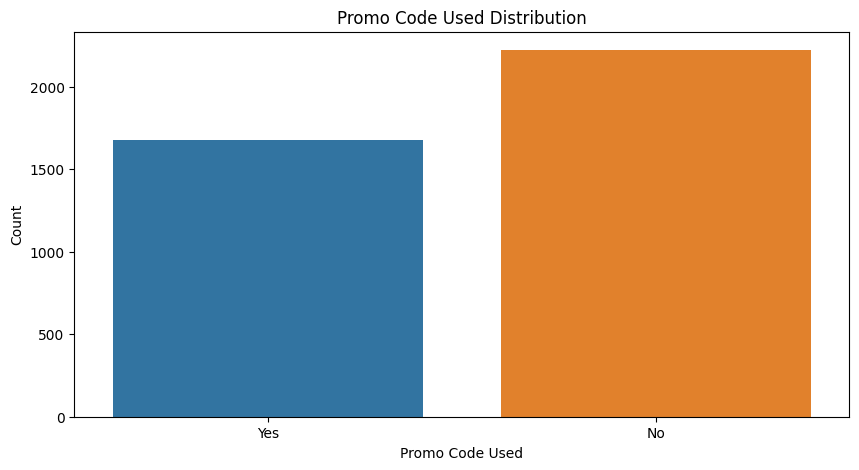

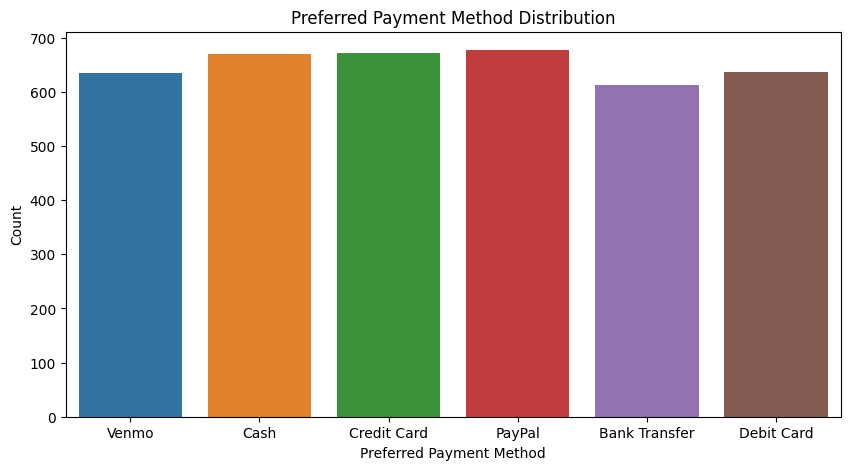

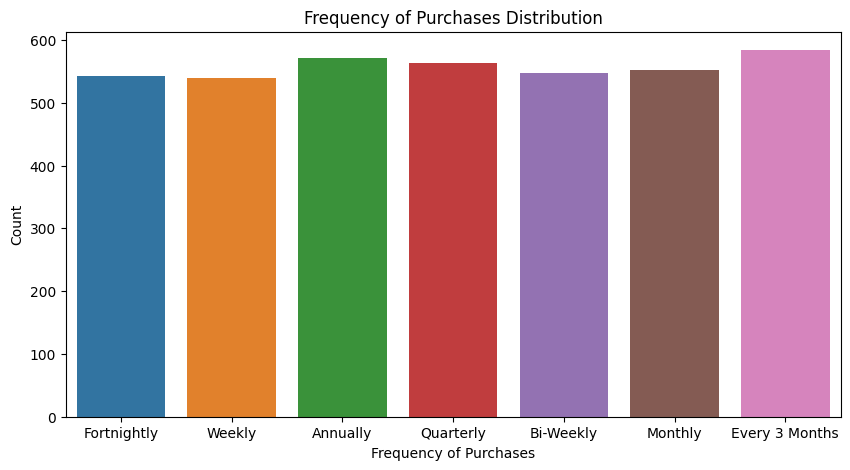

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    # countplot - changed
    sns.countplot(data = data, x = col)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [11]:
print("Summary Statistics:")
print(eda.summary_statistics())

Summary Statistics:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


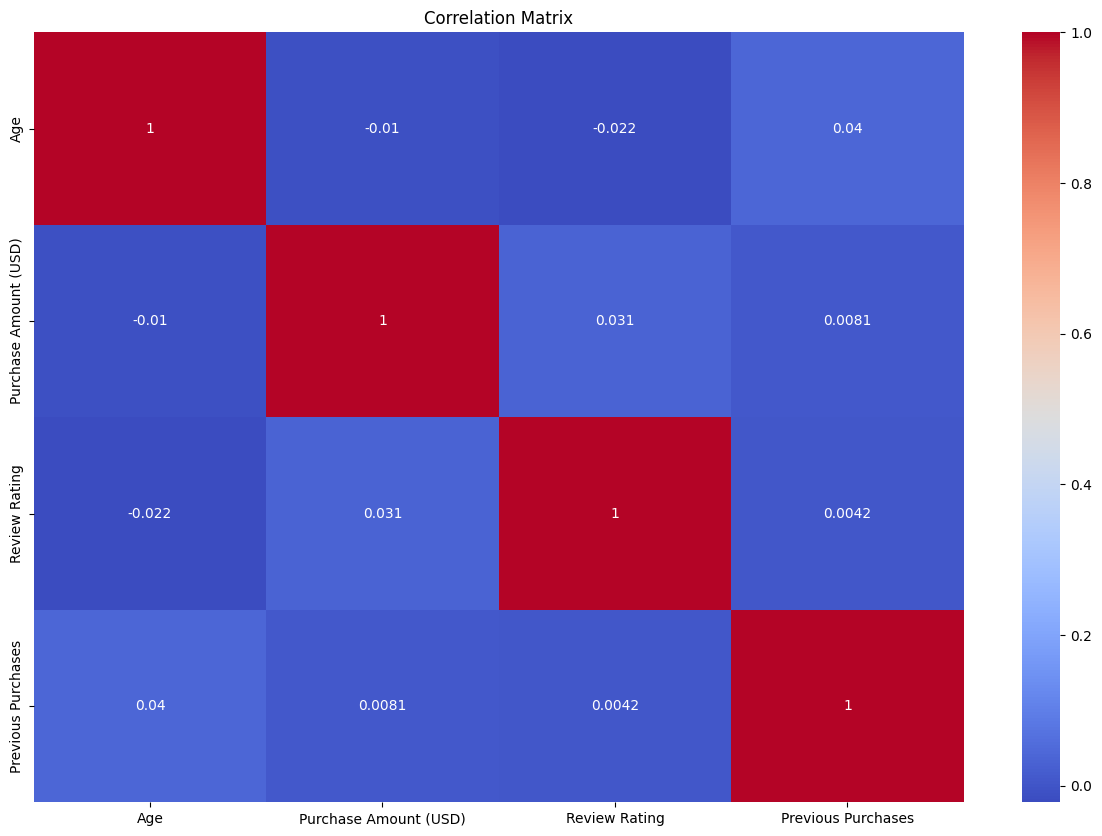

Correlation Statistics:


In [12]:
eda.correlation_matrix()
print("Correlation Statistics:")

In [13]:
eda.correlation_statistics()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


In [14]:
print("Categorical Statistics:")
eda.categorical_statistics()

Categorical Statistics:


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


## test

In [15]:
print("Categorical Correlations:")
eda.categorical_correlations()

Categorical Correlations:


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
Gender,1.000000,0.078855,0.012387,0.109221,0.041185,0.056927,0.020583,0.416578,0.016915,0.056029,0.595268,0.595268,0.035365,0.031736
Item Purchased,0.078855,1.000000,1.000000,0.110355,0.072482,0.078978,0.081750,0.079508,0.085597,0.078237,0.090455,0.090455,0.075032,0.076895
Category,0.012387,1.000000,1.000000,0.103174,0.027726,0.078622,0.026040,0.018567,0.039573,0.028568,0.017543,0.017543,0.028196,0.031258
Location,0.109221,0.110355,0.103174,1.000000,0.111185,0.108882,0.116684,0.104285,0.106140,0.106024,0.109682,0.109682,0.115722,0.106307
Size,0.041185,0.072482,0.027726,0.111185,1.000000,0.075805,0.026468,0.015409,0.030017,0.026040,0.025465,0.025465,0.041043,0.035383
Color,0.056927,0.078978,0.078622,0.108882,0.075805,1.000000,0.074335,0.070100,0.070336,0.080060,0.070655,0.070655,0.081961,0.077726
Season,0.020583,0.081750,0.026040,0.116684,0.026468,0.074335,1.000000,0.012646,0.031644,0.034715,0.028504,0.028504,0.043459,0.030238
Subscription Status,0.416578,0.079508,0.018567,0.104285,0.015409,0.070100,0.012646,1.000000,0.025848,0.040194,0.699619,0.699619,0.031455,0.031601
Payment Method,0.016915,0.085597,0.039573,0.106140,0.030017,0.070336,0.031644,0.025848,1.000000,0.031947,0.022231,0.022231,0.035994,0.042970
Shipping Type,0.056029,0.078237,0.028568,0.106024,0.026040,0.080060,0.034715,0.040194,0.031947,1.000000,0.033087,0.033087,0.031221,0.040033


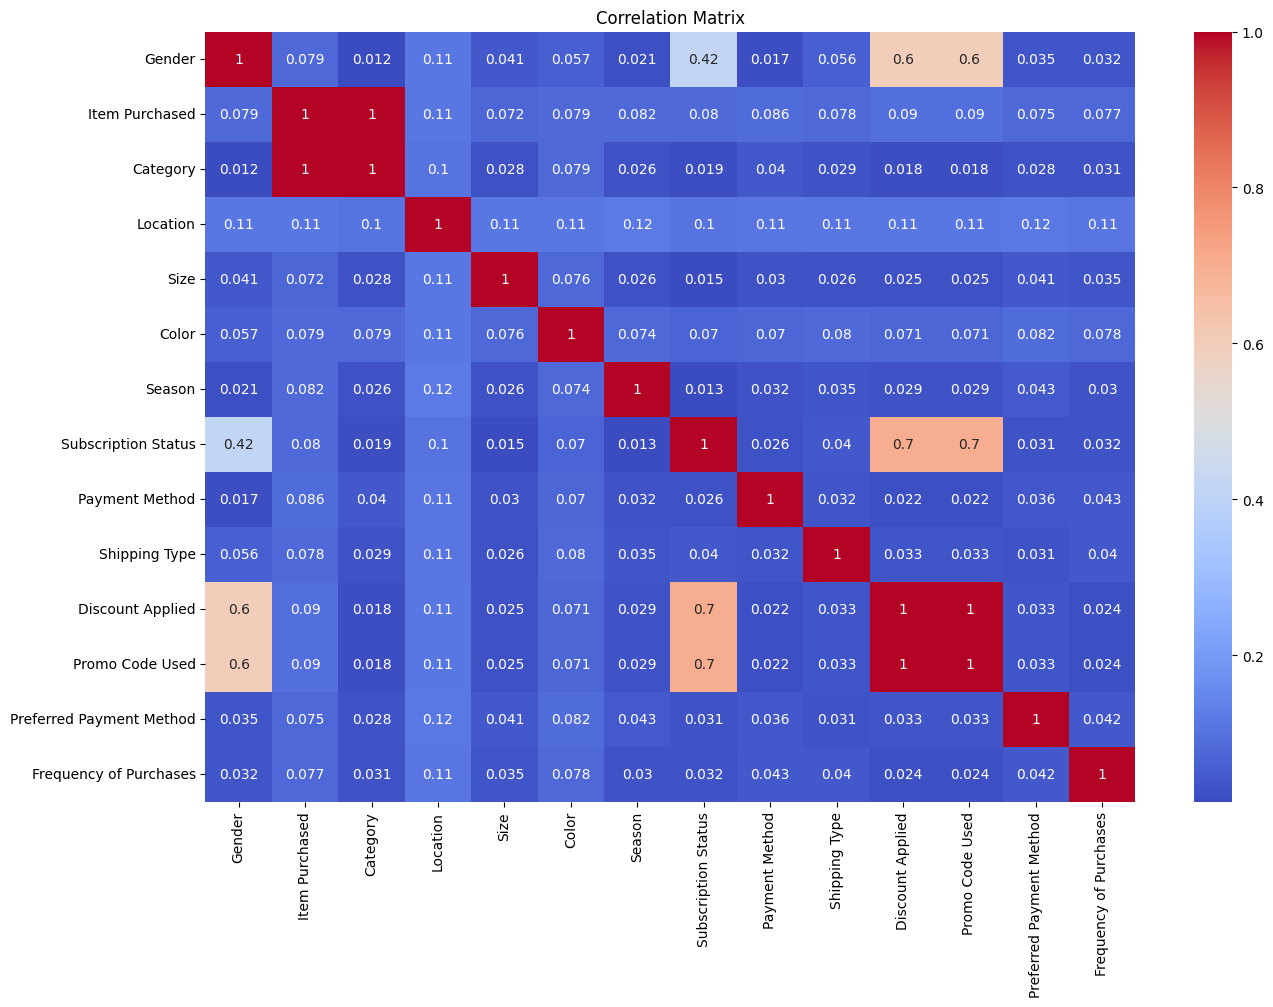

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(eda.categorical_correlations(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Based on the correlation analysis it can be observed that variables 'Discount Applied' and 'Promo Code Used' as well as 'Item Purchased' and 'Category' are highly correlated, thus we decided to remove variables 'Promo Code Used' and 'Item Purchased' not to include collinearity in the estimation.
preprocessed_data = preprocessed_data.drop(columns=['Promo Code Used', 'Item Purchased'])
preprocessed_data

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,
1,55,Male,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
2,19,Male,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
3,50,Male,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
4,21,Male,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
5,45,Male,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,32,Venmo,Weekly
3897,52,Female,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,24,Venmo,Quarterly


In [18]:
# write preprocessed data to csv
preprocessed_data.to_csv('../data/preprocessed_data.csv', index=False)